<a href="https://colab.research.google.com/github/nrupu/ML/blob/main/ML0006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
map_doors = {'two': 2, 'four': 4}
map_cylinders = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['doornumber'] = df['doornumber'].map(map_doors)
df['cylindernumber'] = df['cylindernumber'].map(map_cylinders)

In [ ]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [ ]:
df.dtypes

,0
car_ID,int64
symboling,int64
fueltype,object
aspiration,object
doornumber,int64
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64
carlength,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   doornumber           205 non-null    int64  
 2   wheelbase            205 non-null    float64
 3   carlength            205 non-null    float64
 4   carwidth             205 non-null    float64
 5   carheight            205 non-null    float64
 6   curbweight           205 non-null    int64  
 7   cylindernumber       205 non-null    int64  
 8   enginesize           205 non-null    int64  
 9   boreratio            205 non-null    float64
 10  stroke               205 non-null    float64
 11  compressionratio     205 non-null    float64
 12  horsepower           205 non-null    int64  
 13  peakrpm              205 non-null    int64  
 14  citympg              205 non-null    int64  
 15  highwaympg           205 non-null    int

In [ ]:
df['brand'] = df['CarName'].apply(lambda x: x.split()[0].lower())
df.drop('CarName', axis=1, inplace=True)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,1,0,2,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,1,0,2,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,1,0,2,2,2,0,94.5,171.2,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,2,1,0,4,3,1,0,99.8,176.6,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,1,0,4,3,0,0,99.4,176.6,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,1,0,4,3,2,0,109.1,188.8,...,5,3.78,3.15,9.5,114,5400,23,28,16845.0,25
201,202,-1,1,1,4,3,2,0,109.1,188.8,...,5,3.78,3.15,8.7,160,5300,19,25,19045.0,25
202,203,-1,1,0,4,3,2,0,109.1,188.8,...,5,3.58,2.87,8.8,134,5500,18,23,21485.0,25
203,204,-1,0,1,4,3,2,0,109.1,188.8,...,3,3.01,3.40,23.0,106,4800,26,27,22470.0,25


<Axes: xlabel='price', ylabel='Count'>

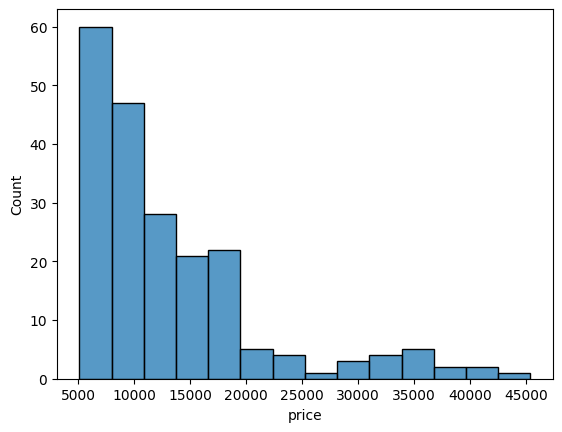

In [ ]:
sns.histplot(df['price'])

<Axes: xlabel='horsepower', ylabel='price'>

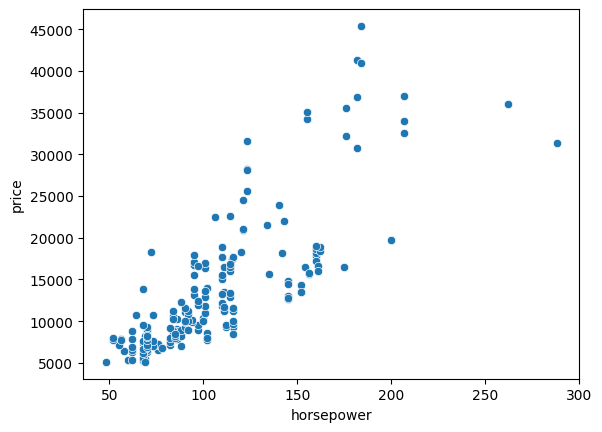

In [ ]:
sns.scatterplot(x='horsepower',y='price',data=df)

<Axes: xlabel='fueltype', ylabel='price'>

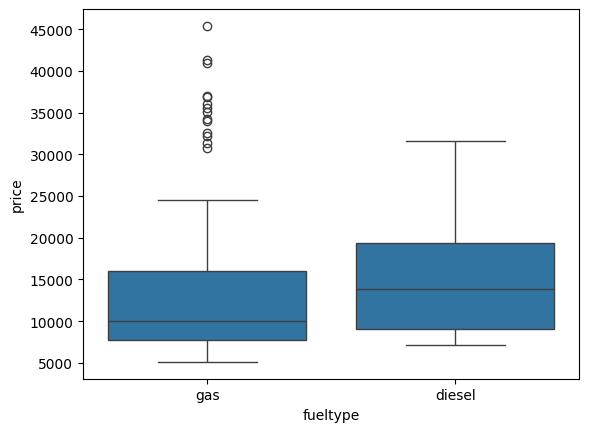

In [ ]:
sns.boxplot(x='fueltype',y='price',data=df)

<Axes: xlabel='carbody', ylabel='price'>

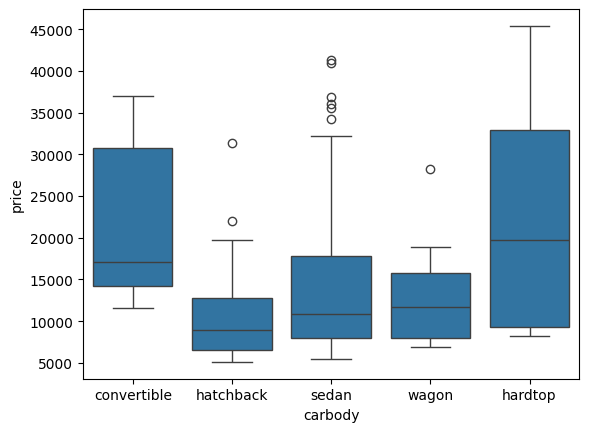

In [ ]:
sns.boxplot(x='carbody',y='price',data=df)

In [ ]:
#oneheart encoding don't consider priority
df = pd.get_dummies(df, drop_first=True)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,False,False,False,False,False,False,False,False,False,False
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,False,False,False,False,False,False,False,False,False,False
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,False,False,False,False,False,False,False,False,False,False
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,False,False,False,False,False,False,False,False,False,False
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,109.1,188.8,68.9,55.5,2952,4,141,...,False,False,False,False,False,False,False,False,True,False
201,202,-1,4,109.1,188.8,68.8,55.5,3049,4,141,...,False,False,False,False,False,False,False,False,True,False
202,203,-1,4,109.1,188.8,68.9,55.5,3012,6,173,...,False,False,False,False,False,False,False,False,True,False
203,204,-1,4,109.1,188.8,68.9,55.5,3217,6,145,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
df.drop(['car_ID'],axis=1,inplace=True)

In [ ]:
X=df.drop('price',axis=1)
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Fit the polynomial regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)
print(r2_score(y,y_pred))

0.9988315485856182


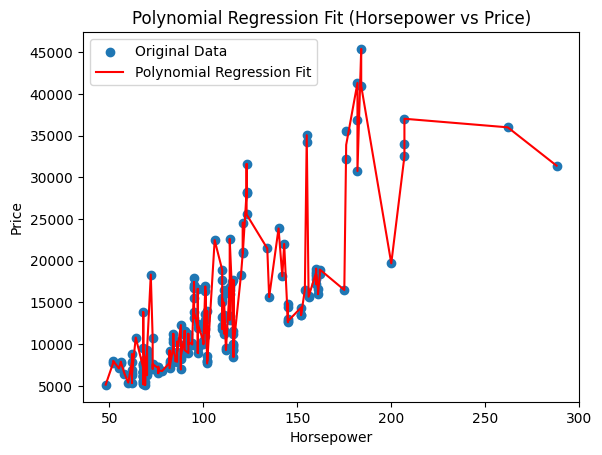

In [ ]:
sort_index = X['horsepower'].sort_values().index

# Plot the original data points
plt.scatter(X['horsepower'], y, label='Original Data') # Adding original data for comparison

# Plot the polynomial regression fit, using the sorted index
plt.plot(X['horsepower'][sort_index], y_pred[sort_index], color='red', label='Polynomial Regression Fit')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Polynomial Regression Fit (Horsepower vs Price)')
plt.legend() # Add a legend to differentiate between original data and fitted line
plt.show()